In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import weibull_min
import seaborn as sns

In [122]:
# data contains sorted mean task duration time by MDM-specialists in the workflow processes
# of creation library component in PLM system
mean_durations = pd.read_csv('data/mean_duration.csv')
mean_durations.head(10)

,mean_duration
0,1.25
1,1.50
2,1.50
3,1.75
4,2.00
5,2.00
6,2.00
7,2.25
8,2.25
9,2.50


In [123]:
print(f'bin width: {int(mean_durations.max()/170)}')

bin width: 260


In [124]:
# Remove last ejections (> 6800)
mean_durations = mean_durations.drop(mean_durations[mean_durations.mean_duration > 6800].index)

Text(0, 0.5, 'Quantity')

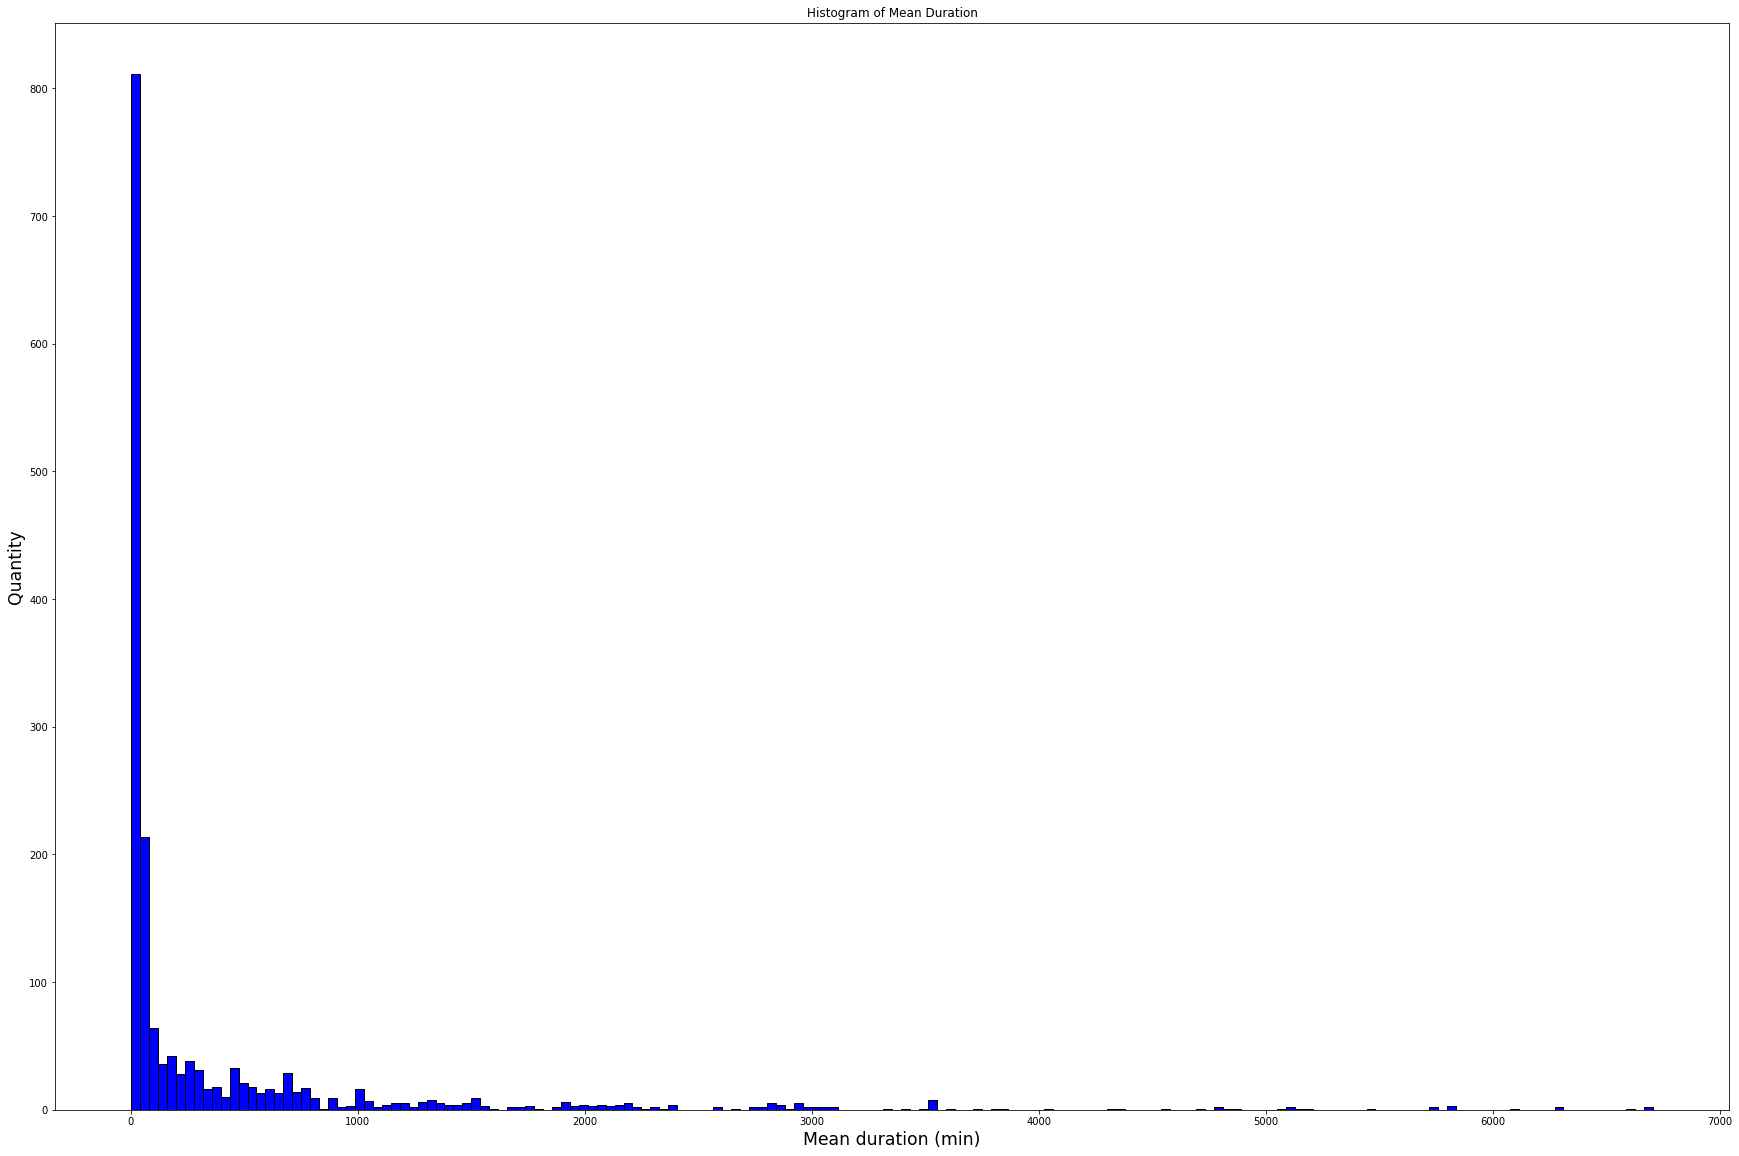

In [125]:
plt.hist(mean_durations['mean_duration'], color = 'blue', edgecolor = 'black',
         bins = 170)
plt.title('Histogram of Mean Duration')
plt.xlabel('Mean duration (min)')
plt.ylabel('Quantity')

In [126]:
print(f'bin width: {int(mean_durations.max()/170)}')

bin width: 39


In [127]:
median = mean_durations.median(axis = 0)
print(median)

mean_duration    45.5
dtype: float64


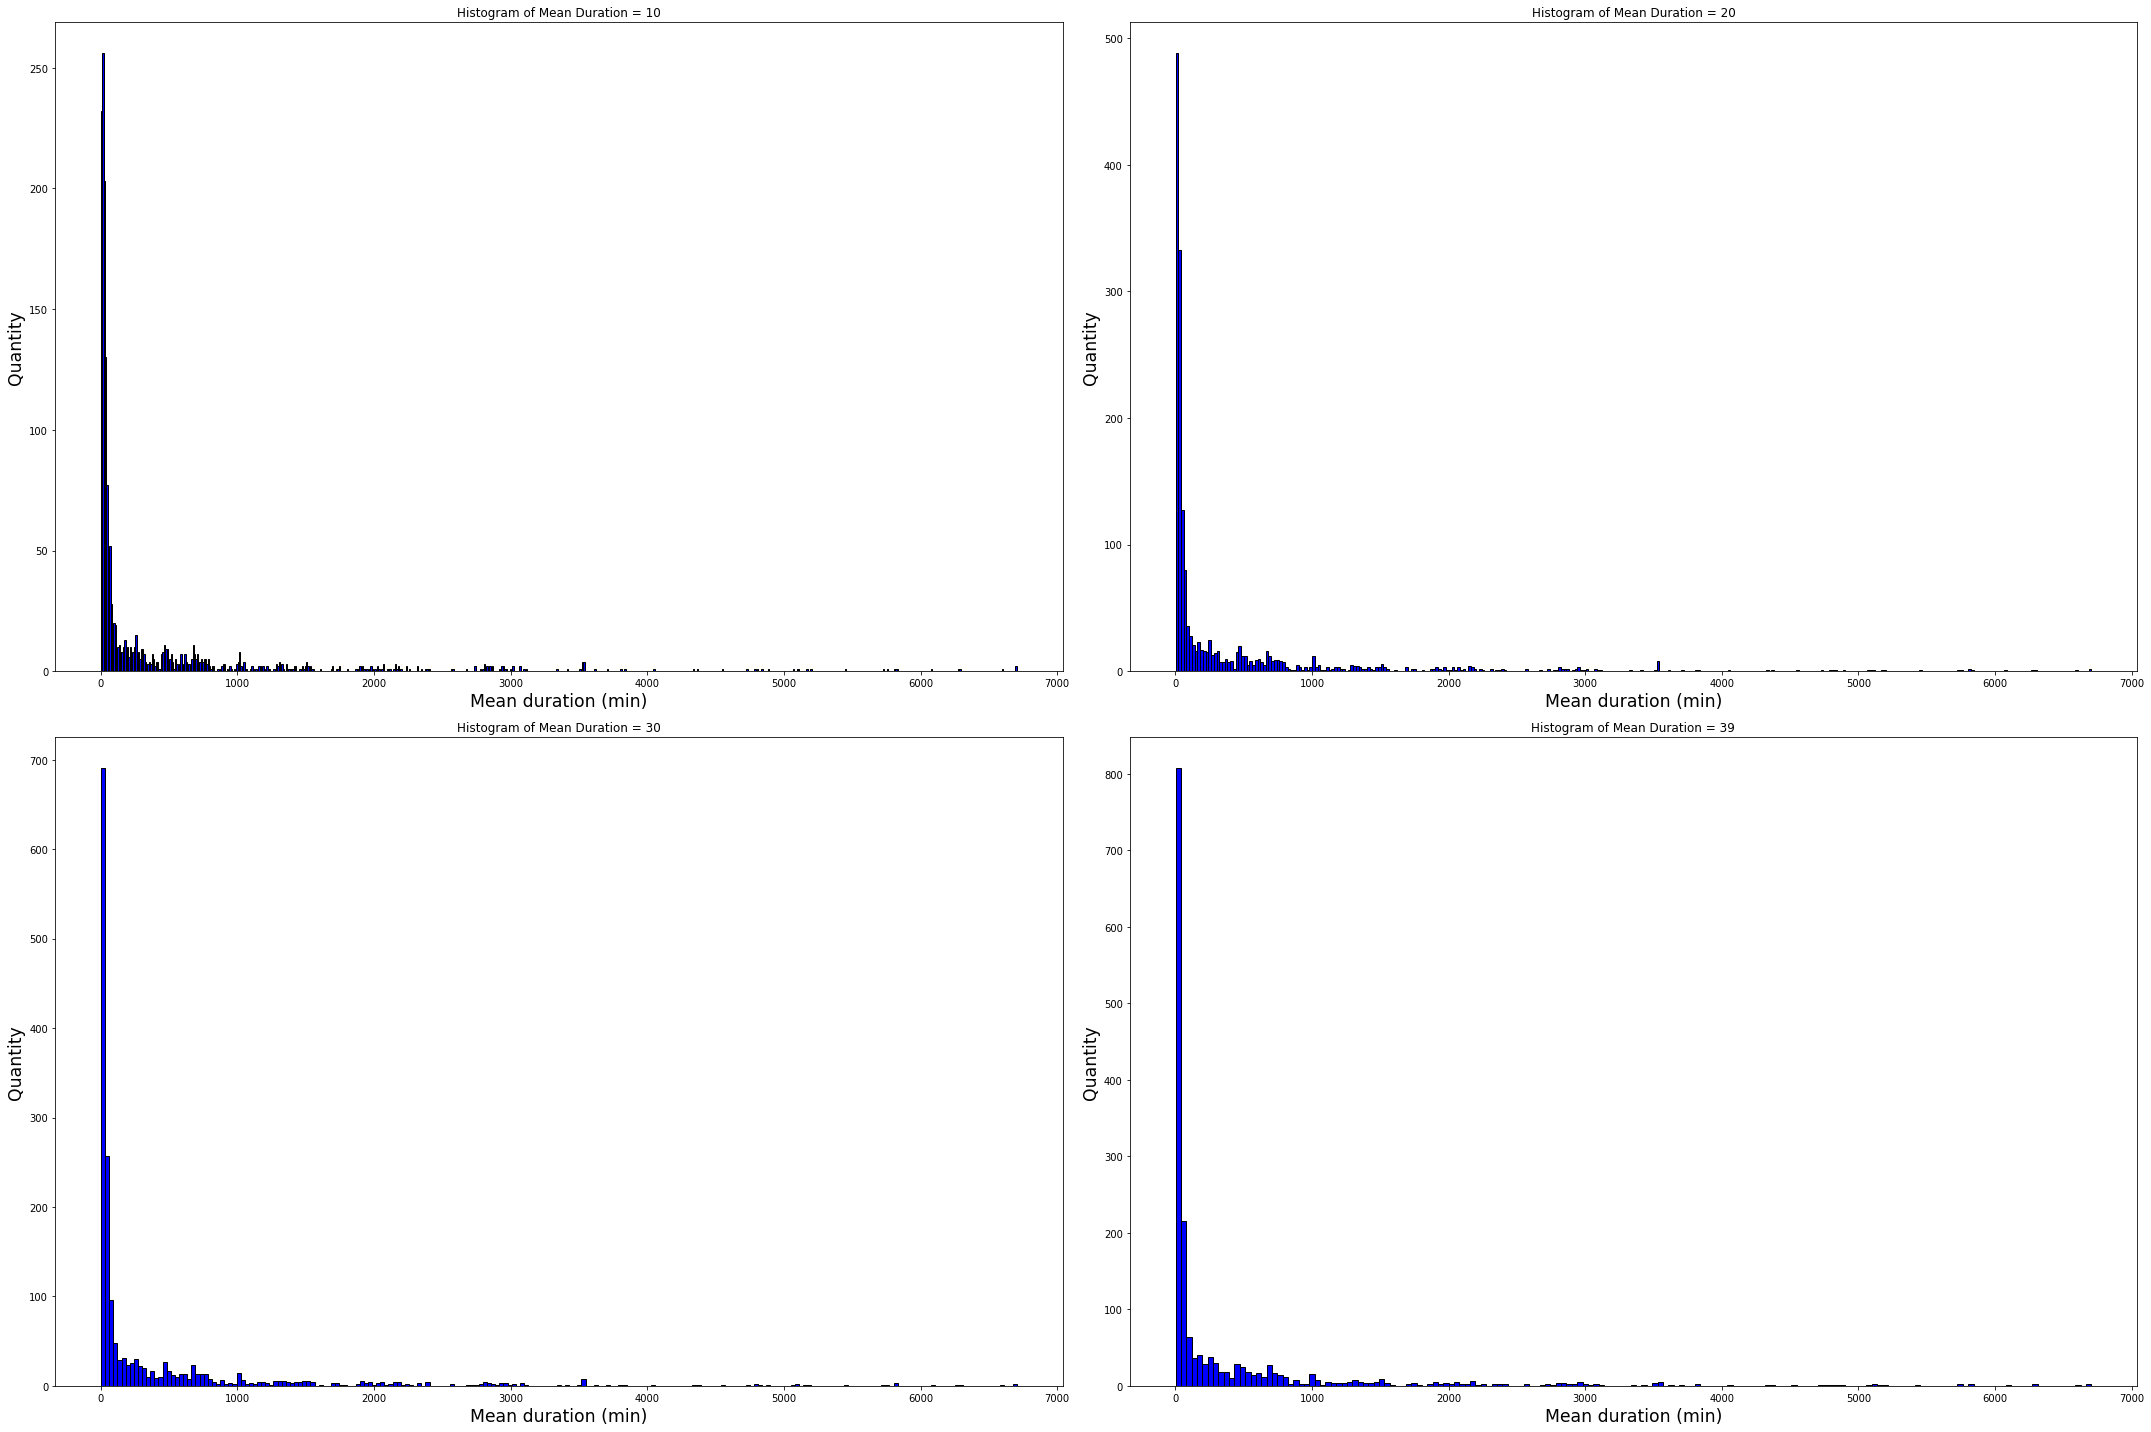

In [128]:
# Show 4 different binwidths
for i, binwidth in enumerate([10, 20, 30, 39]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(mean_durations['mean_duration'], bins = int((mean_durations.max() - mean_durations.min())/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    plt.rcParams['figure.figsize'] = [18, 12]
    ax.set_title('Histogram of Mean Duration = %d' % binwidth)
    ax.set_xlabel('Mean duration (min)')
    ax.set_ylabel('Quantity')

plt.tight_layout()
plt.show()

In [129]:
# a - scale parameter (lambda in wiki)
# b - shape parameter (k in wiki)
# return PDF
def weib(x,a,b):
    return (b / a) * (x / a) ** (b - 1) * np.exp(-(x / a) ** b)

In [130]:
shape, loc, scale = weibull_min.fit(mean_durations, floc = 0)
print(f'shape: {shape}')
print(f'loc: {loc}')
print(f'scale: {scale}')

shape: 0.5278734556310806
loc: 0
scale: 201.34088526168077


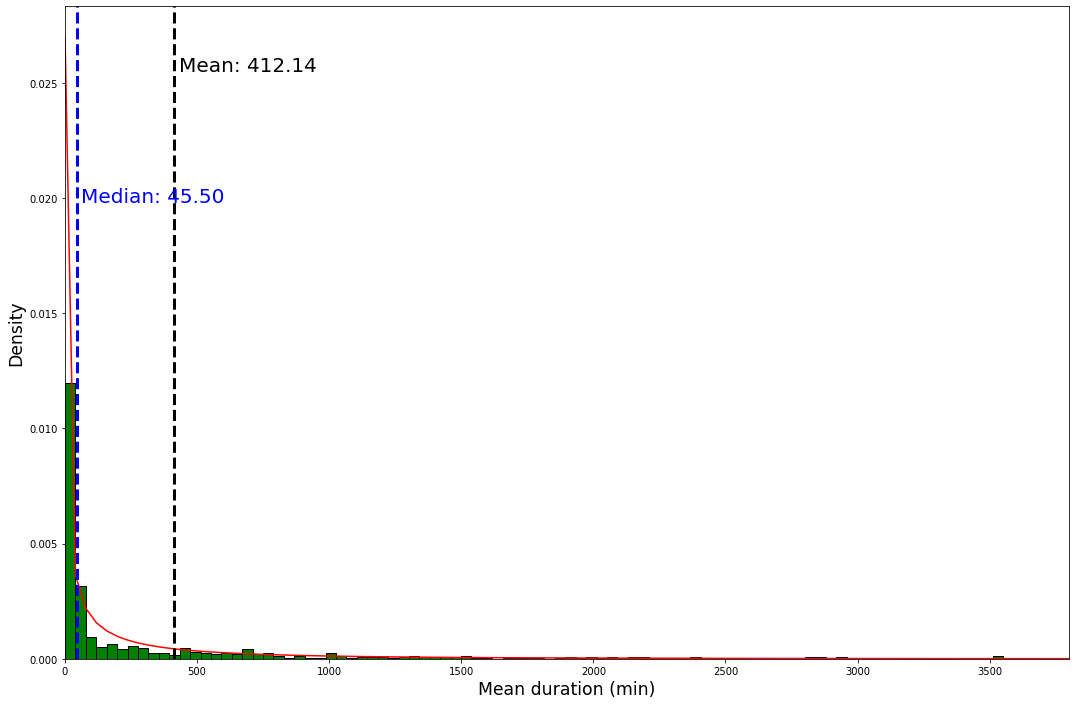

In [131]:
x = np.linspace(mean_durations.min(), mean_durations.max(), 170)

plt.plot(x, weib(x, scale, shape), color = 'red', linewidth = 1.5)
plt.hist(mean_durations['mean_duration'], color = 'green', edgecolor = 'black', density = True,
         bins = 170)

plt.axvline(mean_durations.to_numpy().mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(np.median(mean_durations.to_numpy()), color='b', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_durations.to_numpy().mean()*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_durations.to_numpy().mean()), fontsize = 20)
plt.text(mean_durations.to_numpy().mean()*0.15, max_ylim*0.7, 'Median: {:.2f}'.format(np.median(mean_durations.to_numpy())), fontsize = 20, color='b')

ax = plt.gca()
ax.set_xlim([0, 3800])
#ax.set_ylim([0, 0.005])
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['axes.labelsize'] = 'xx-large'
plt.xlabel('Mean duration (min)')
plt.ylabel('Density')
plt.show()

In [132]:
# normalized =  count / (number of observations * bin width)
print('normalized for 1st bin: {:.4f}'.format(790/(1716*39)))
print('normalized for 2nd bin: {:.4f}'.format(230/(1716*39)))

normalized for 1st bin: 0.0118
normalized for 2nd bin: 0.0034
